# Indo além do Matplotlib: Seaborn e Plotly

Nas aulas anteriores, exploramos um pouco como criar visualizações simples e básicas utilizando a biblioteca `matplotlib`. Hoje apresentaremos duas novas bibliotecas que são muito úteis na tarefa de criar visualizações de maneira mais simples e eficiente: `seaborn` e `plotly`.

# Seaborn

Seaborn é uma biblioteca para visualização de dados em Python e que pode ser considerada uma extensão da matplotlib. O foco desta biblioteca é permitir visualização de estatística dos dados estudados de maneira mais simples. Ela ainda oferece a possibilidade de trabalhar de forma simplificada com conjuntos de dados em forma de DataFrame (pandas) ou arrays (numpy) sem necessidades de muitas modificações.

Nesta seção, vamos aprender como utilizar o seaborn para construir diversas visualizações úteis tanto para a análise exploratória dos dados quanto para a apresentação clara destes dados. Para exemplificar os casos de uso, utilizaremos dois conjuntos de dados:

*   Baby names dataset
*   Wine quality dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [ ]:
df_wines = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter = ';')
df_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Gráficos de pontos / Scatterplots

O primeiro tipo de gráfico que vamos explorar são os gráficos de pontos. Estes gráficos são bastante versáteis e podem ser utilizados para visualizar correlações (*scatterplots* ou gráficos de dispersão), séries temporais ou até mesmo rankings. Do ponto de vista do aspecto visual, é importante destacar que para evitar distorções, é recomendável que estes gráficos sejam quadrados, principalmente os gráficos de dispersão.

O comando básico para gerar um gráfico de dispersão no `seaborn` (sns) é: `sns.scatterplot(x, y, data)`, onde:

*   **x** é a nossa variável a ser mostrada no eixo x (geralmente a variável  independente)
*   **y** é a nossa variável a ser mostrada no eixo y (geralmente a variável dependente)
*   **data** é o conjunto de de dados que iremos mostrar

É importante lembrar que esses parâmetros são comuns a praticamente todos as visualizações da biblioteca `seaborn`.

<Axes: xlabel='fixed acidity', ylabel='pH'>

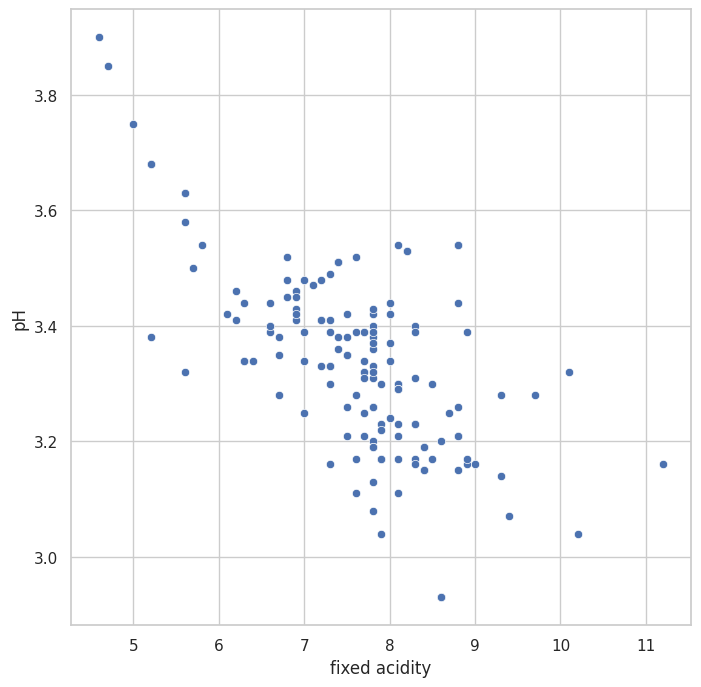

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="fixed acidity", y="pH", data=df_wines[:150])

Com a visualização acima, já conseguimos ver que há alguma correlação entre as variáveis mostradas: acidez fixa e pH.

Entretanto, quando trabalhamos com visualizações como os gráficos de pontos, existem diversos recursos visuais que podem ser utilizados para comunicar mais informações, a exemplo das cores, tamanhos e formas geométricas dos pontos utilizados. O seaborn nos oferece como parte da função `scatterplot`, uma série de maneiras de incluir essas informações em nossa visualização. Isso é especialmente útil quando estamos explorando conjuntos de dados como o wine dataset, que possui diversas variáveis, incluindo categóricas. Para usar estes recursos, nossa chamada passa a ser: `sns.scatterplot(x, y, hue, size, style, data)` na qual:

*   **hue**, (tonalidade) é o nome da variável que controlará as cores utilizadas na visualização
*   **size** (tamanho) é o nome da variável que controlará o tamanho dos pontos/marcadores da visualização
*   **style** (estilo) é o nome da variável que definirá o estilo/tipo de marcador utilizado

Um fato interessante é que o parâmetro `hue` também é comum a quase todas as visualizações da biblioteca. Entretanto, somente algumas visualizações específicas compartilham dos parâmetros `size` e/ou `style`. Vejamos como cada um pode ser usado para incluir novas informações em nosso `scatterplot`. Vamos incluir agora a variável densidade em nossa visualização utilizando as cores para passar esta nova informação.

<Axes: xlabel='fixed acidity', ylabel='pH'>

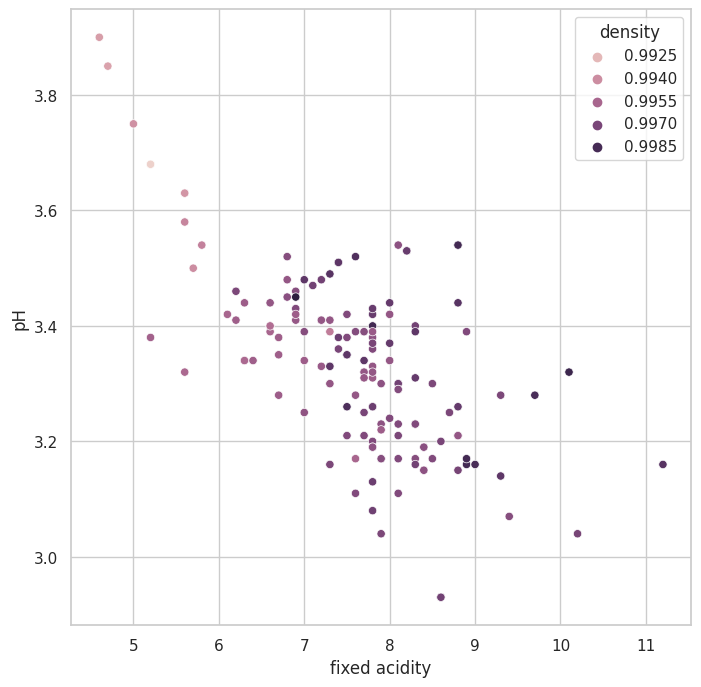

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="fixed acidity", y="pH",hue="density", data=df_wines[:150])


Utilizando o tamanho dos pontos, podemos ver como essas duas variáveis se relacionam com o teor de ácido cítrico do vinho.

<Axes: xlabel='fixed acidity', ylabel='pH'>

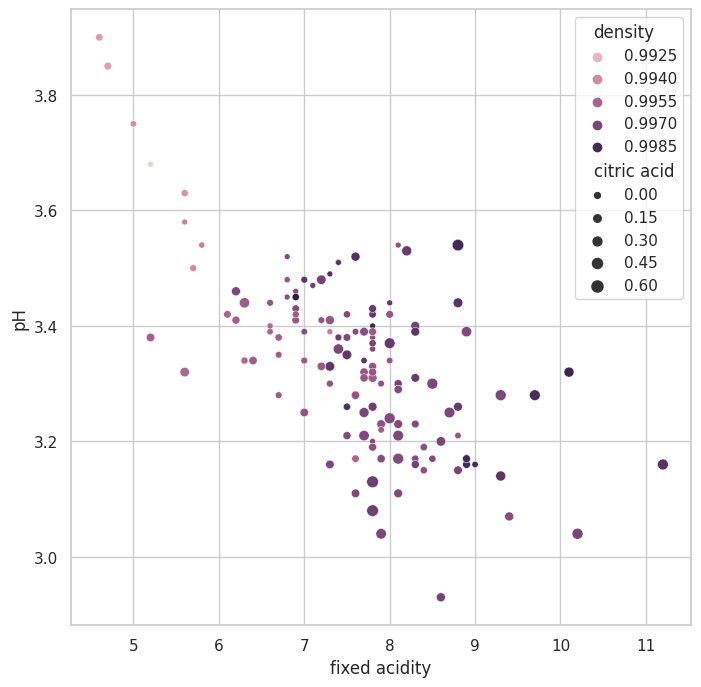

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="fixed acidity", y="pH",hue="density", size="citric acid",data=df_wines[:150])

Podemos ainda incluir a qualidade como tipo de marcador, e buscar analisar como as quatro variáveis mostradas se relacionam com ela.

<Axes: xlabel='fixed acidity', ylabel='pH'>

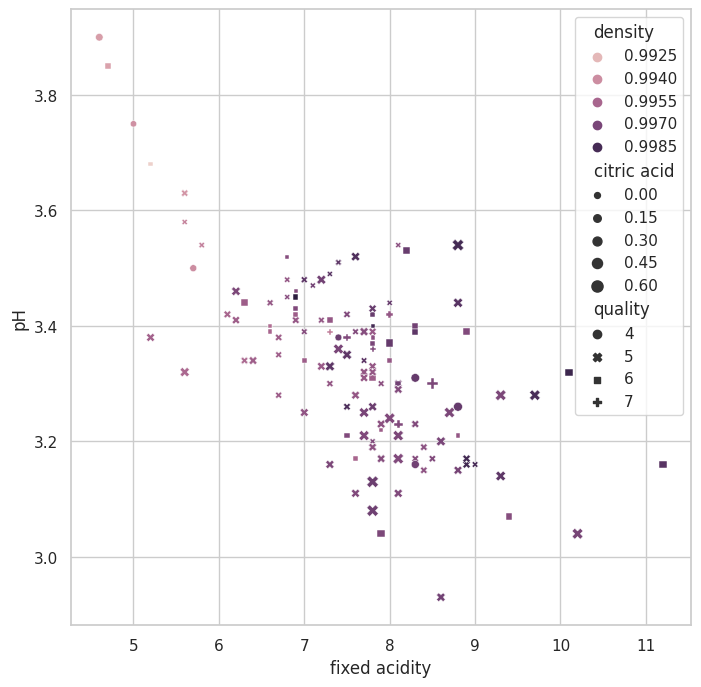

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="fixed acidity", y="pH",hue="density", size="citric acid", style="quality", data=df_wines[:150])

Por fim, é possível controlar a paleta de cores utilizadas modificando o parâmetro `palette`.

<Axes: xlabel='fixed acidity', ylabel='pH'>

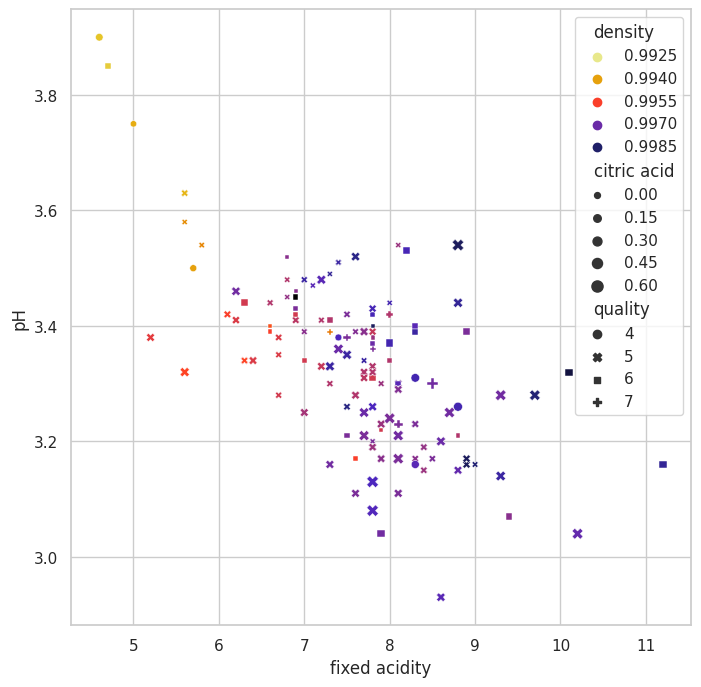

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="fixed acidity", y="pH",hue="density", size="citric acid", style="quality", palette='CMRmap_r', data=df_wines[:150])

# Gráficos de barras

Barras são uma forma interessante de representar dados, sejam eles categóricos ou numéricos, discretos ou contínuos. Dentre os tipos de relacionamentos que podem ser representados através de gráficos de barras estão as distribuições, os rankings e desvios. Na biblioteca `seaborn` existem alguns tipos de gráficos de barras que podemos utilizar, entre eles: `barplot()`, `histplot()`, `countplot()` e `catplot()`. Vejamos alguns exemplos de usos e personalizações possíveis a seguir.

**Histogramas**

Para a nossa primeira visualização, queremos responder à pergunta: Qual a distribuição da variável pH no conjunto de dados wine quality dataset? É possível encontrar a resposta analisando um histograma simples, como mostrado abaixo.

<Axes: xlabel='pH', ylabel='Count'>

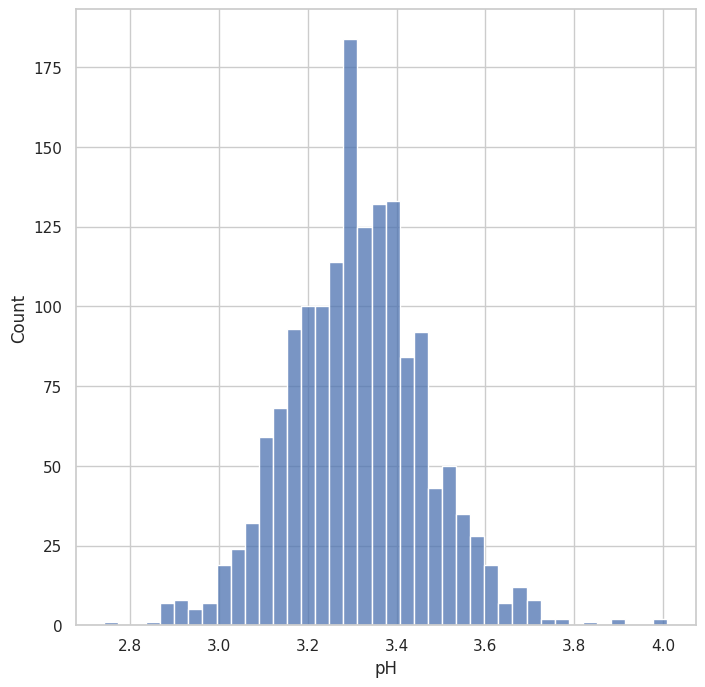

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x='pH', data=df_wines)

Podemos transformar nosso histograma em um histograma de barras sobrepostas passando uma das colunas como argumento para o parâmetro `hue`. Neste caso, vemos que o total é decomposto em barras de cores diferentes cuja altura indica a quantidade de vinhos em certa faixa de pH que recebeu a qualidade correspondente. Isso seria uma das formas de respondermos à pergunta: Como o pH varia para cada nível de qualidade?

<Axes: xlabel='pH', ylabel='Count'>

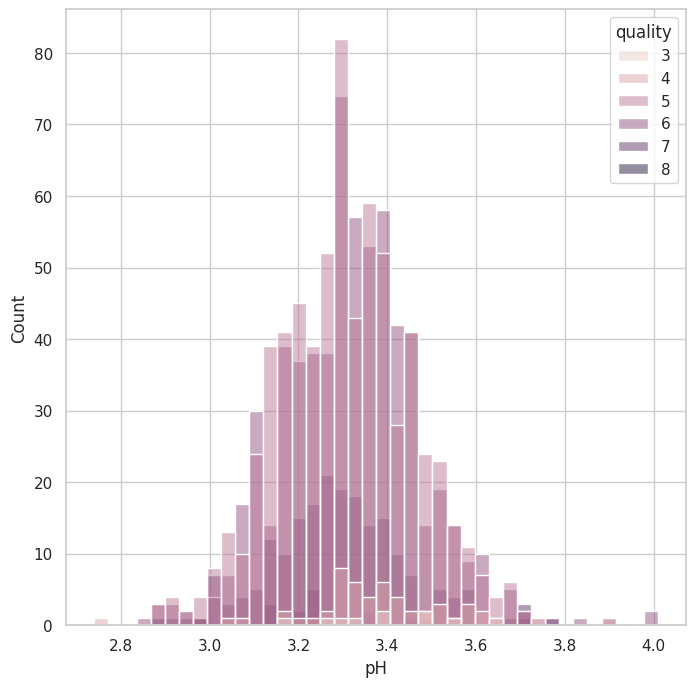

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x='pH', hue='quality', data=df_wines)

Veja que usamos somente a variável x no exemplo acima. É possível usar também a variável y. Definindo x e y, o gráfico passa a se assemelhar a um scatterplot, onde ao invés de pontos temos quadrados cuja intensidade da cor indicará o número de ocorrências daquela combinação (x, y). Por este motivo, ao usarmos os três parâmetros (x, y, hue), estaremos perdendo informação importante na visualização.

<Axes: xlabel='pH', ylabel='quality'>

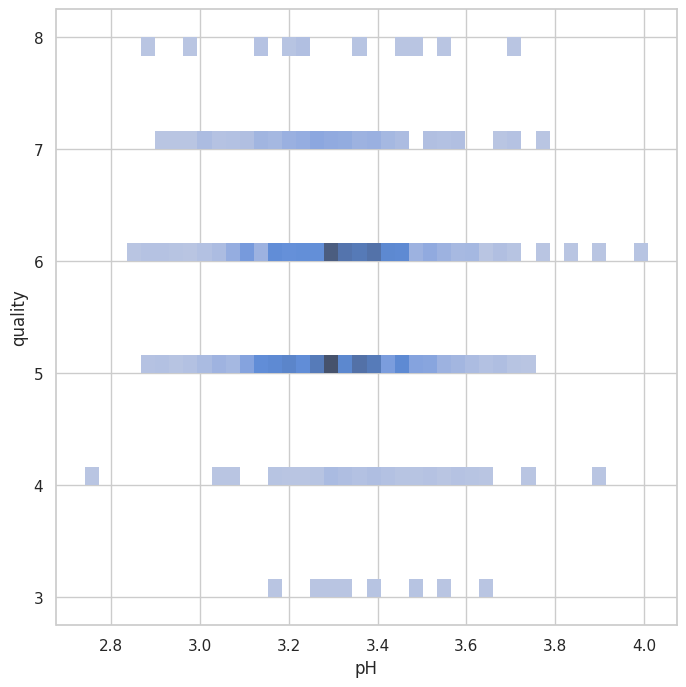

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x='pH', y='quality', data=df_wines)

Observe que no caso de definirmos x e y para um histograma, é como se estivéssemos observando vários histogramas de cima. Isso é mais fácil de visualizar quando relacionamos uma variávelcategórica com uma contínua, como fizemos acima. Por esta razão, esta visualização pode ser considerada uma forma melhor de responder à pergunta anterior. Observe a semelhança entre a linha *quality* = 4 e o histograma abaixo.

<Axes: xlabel='pH', ylabel='Count'>

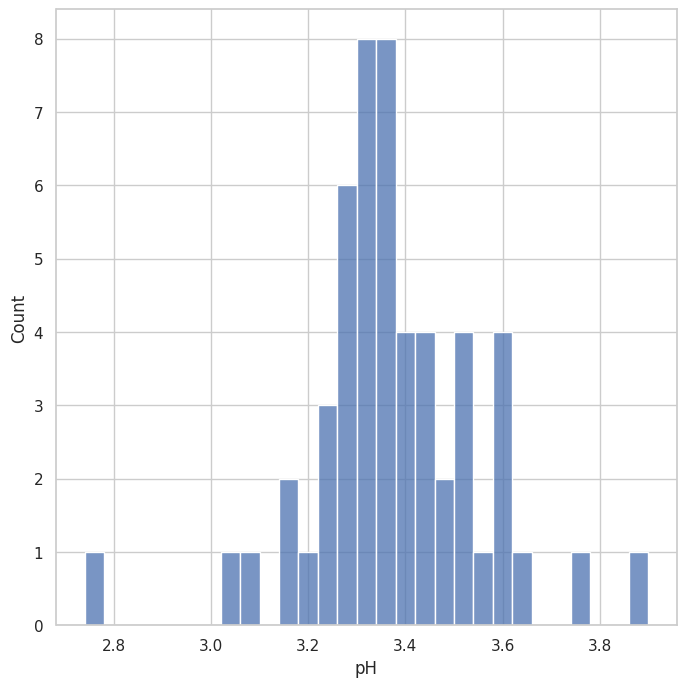

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x='pH', data=df_wines[df_wines['quality']==4],binwidth=0.04)

Por fim, veja que usamos o parâmetro `binwidth` no último histograma. Esse parâmetro serve para controlar o número de `bins`, neste caso limitando o tamanho/largura da faixa coberta por cada um a 0.04. Poderíamos obter resultados semelhantes passando o parâmetro bins, e definindo o número de bins que desejamos, ou até mesmo passando as faixas manualmente.

**Barras verticais e horizontais**

Nas visualizações a seguir, utilizaremos o conjunto de dados *US baby names*, que traz uma contagem do nome de bebês registrados entre os anos de 1910 e 2014 nos Estados Unidos. Estes nomes estão divididos por estado e classificados de acordo com o gênero de nascimento de cada bebê.

Considere que desejamos responder à pergunta: Quais os 10 nomes de bebê mais populares no ano 2000? É possível encontrar a resposta analisando um gráfico de barras simples, mas para isso, precisamos primeiro realizar algumas operações em nosso dataframe, conforme mostrado a seguir. Veja que o método `reset_index()` deve ser chamado, pois ao usar groupby, transformamos Name e Gender em um índice duplo, que não pode ser usado pelo seaborn.

In [ ]:
df_baby = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/04-EDA-e-Vis/baby.csv')
baby_2000 = df_baby.loc[df_baby['Year']==2000,['Name','Gender','Count']].groupby(['Name','Gender']).sum().sort_values('Count',ascending=False)[:10].reset_index()
baby_2000

,Name,Gender,Count
0,Jacob,M,34465
1,Michael,M,32025
2,Matthew,M,28569
3,Joshua,M,27531
4,Emily,F,25952
5,Christopher,M,24928
6,Nicholas,M,24650
7,Andrew,M,23632
8,Hannah,F,23073
9,Joseph,M,22818


<Axes: xlabel='Name', ylabel='Count'>

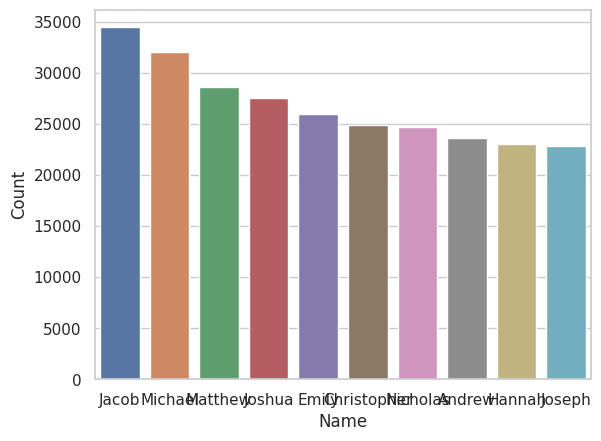

In [ ]:
#baby_2000.reset_index()
sns.barplot(x='Name', y='Count', data=baby_2000)

Por padrão, os gráficos de barra atribuem uma cor a cada barra. Em geral, isso é um desperdício de recurso visual. Podemos deixar todas as barras da mesma cor, passando o parâmetro color.

<Axes: xlabel='Name', ylabel='Count'>

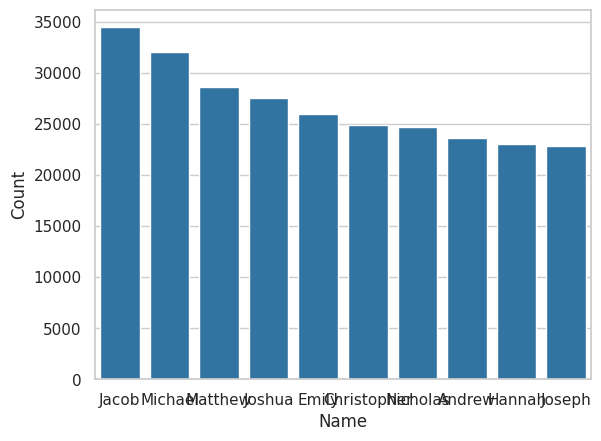

In [ ]:
sns.barplot(x='Name', y='Count', data=baby_2000, color='tab:blue')

Podemos também utilizar o parâmetro hue para aproveitarmos este recurso visual para passar mais informações, como por exemplo, responder à pergunta: Qual desses nomes são masculinos e quais são femininos? Observe, no entanto, que as barras passam a ser agrupadas.

<Axes: xlabel='Name', ylabel='Count'>

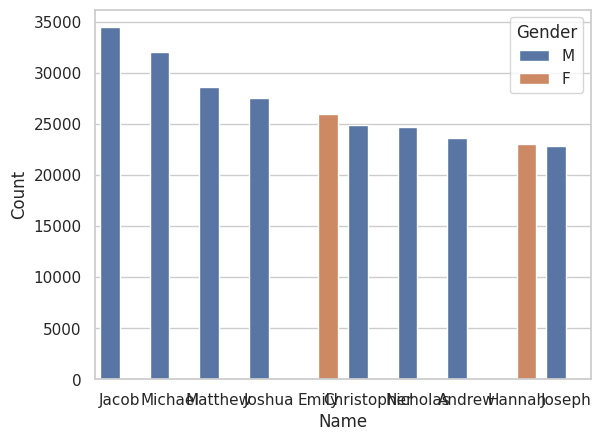

In [ ]:
sns.barplot(x='Name', y='Count', hue = 'Gender', data=baby_2000)

Por fim, se invertermos x e y, então as barras passam a ficar na horizontal

<Axes: xlabel='Count', ylabel='Name'>

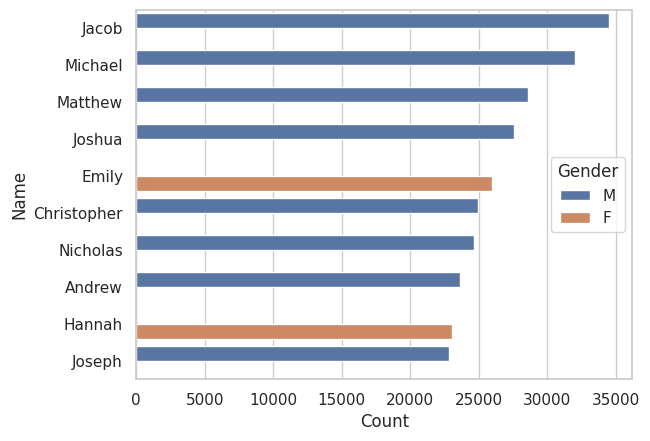

In [ ]:
sns.barplot(x='Count', y='Name', hue = 'Gender', data=baby_2000)

# Gráficos de linha

Gráficos de linha são úteis para mostrar relações entre dados numéricos, geralmente contínuos. Um exemplo desse tipo de gráfico são as séries temporais, que buscam mostrar como uma variável muda ao longo do tempo, que geralmente é representado de forma contínua.

Ainda utilizando o conjunto de dados de nomes de bebês, podemos verificar como a popularidade de alguns nomes variou ao longo dos anos retratados. Como exemplo, vejamos os nomes Mary, Anna, John and Joseph. Para isso, podemos utilizar os parâmetros `x`, `y` e `hue`.

In [ ]:
data = df_baby.loc[df_baby['Name'].isin(['Joan', 'Jessica','John', 'Joseph']),['Name', 'Year', 'Count']].groupby(['Name','Year']).sum()
data

Count
Name    Year       
Jessica 1910      6
        1911      6
        1912     16
        1913      7
        1914     11
...             ...
Joseph  2010  13798
        2011  12923
        2012  12503
        2013  12167
        2014  11995

[418 rows x 1 columns]

<Axes: xlabel='Year', ylabel='Count'>

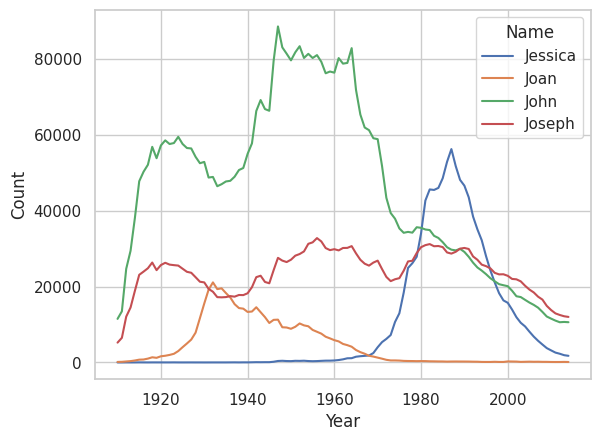

In [ ]:
sns.lineplot(x='Year', y='Count', hue='Name',data=data)

Uma característica interessante do `lineplot` é que quando possuimos mais que um valor associado a determinada variável ou combinação de variáveis sendo plotadas, ele automaticamente reconhece que existe uma determinada faixa de valores possíveis, por isso, por padrão ele mostrará a média e um intervalo de confiança para os valores mostrados, conforme é possível vermos abaixo quando plotamos a evolução da popularidade do nome Andrew ao longo do tempo, sem eliminar a informação dos estados. Este intervalo de confiança é controlado pelo parâmetro `ci`, que pode ser desativado, recebendo o valor `False`

In [ ]:
df_baby[df_baby['Name']=='Andrew']

,Id,Name,Year,Gender,State,Count
13793,13794,Andrew,1914,M,AK,5
13819,13820,Andrew,1916,M,AK,10
13863,13864,Andrew,1918,M,AK,6
13890,13891,Andrew,1919,M,AK,5
13901,13902,Andrew,1920,M,AK,8
...,...,...,...,...,...,...
5646594,5646595,Andrew,2010,M,WY,17
5646789,5646790,Andrew,2011,M,WY,13
5646926,5646927,Andrew,2012,M,WY,19
5647111,5647112,Andrew,2013,M,WY,14


<Axes: xlabel='Year', ylabel='Count'>

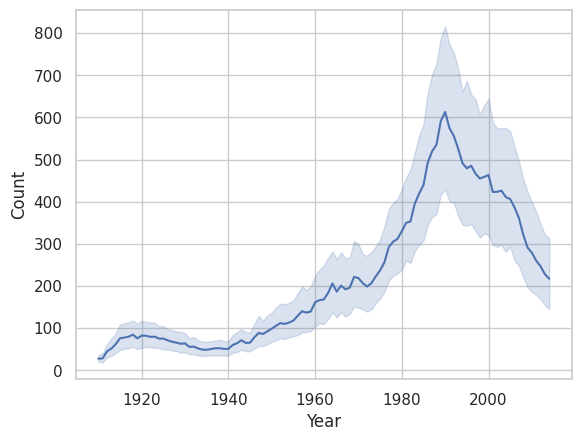

In [ ]:
sns.lineplot(x='Year', y='Count',data=df_baby[df_baby['Name']=='Andrew'])

# Boxplots e Violin Plot

Duas visualizações bastante úteis para representar distribuições são os boxplots e os violin plots. O primeiro deles traz informações importantes sobre as distribuições como percentís (limites da caixa), mediana (linha ao centro) e os extremos (*whiskers*). Assim como as demais visualizações mostradas, os boxplots possuem os parâmetros `x`, `y`, `hue`, que podem receber variáveis do conjunto de dados, de maneira a agregar ainda mais informações.

<Axes: >

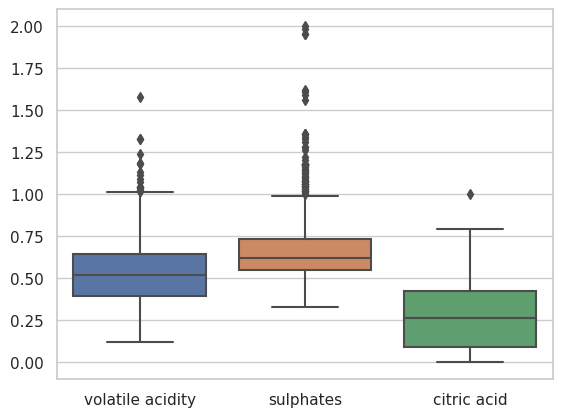

In [ ]:
sns.boxplot(data = df_wines[['volatile acidity', 'sulphates', 'citric acid']])

Os pontos que vemos acima ou abaixo das linhas nos extremos (*whiskers*) são chamados de *outliers*. Estes pontos representam partes da amostra que diferem significativamente das demais observações. É possível eliminar estes pontos da visualização utilizando o parâmetro `fliersize` e passando o valor zero para ele.

<Axes: >

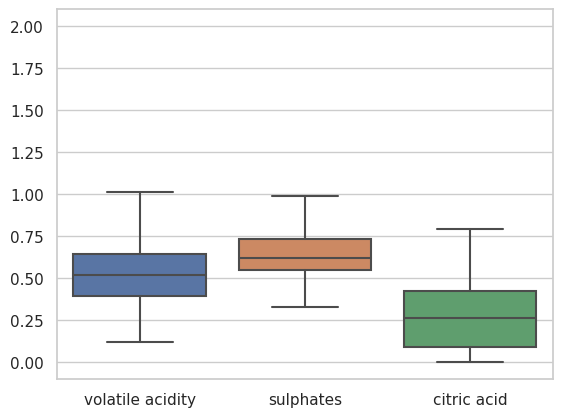

In [ ]:
sns.boxplot(data = df_wines[['volatile acidity', 'sulphates', 'citric acid']], fliersize = 0)

Apesar de ser bastante similar em propósito ao boxplot, os violinplots diferem deles pois englobam todo o conjunto de dados. O objetivo é mostrar a distribuição do conjunto de dados, de maneira que a largura de uma seção do plot é proporcional à frequência daquela faixa na distribuição analisada. Assim como os boxplots, a chamada é bastante simples, mas também permite personalização.

<Axes: >

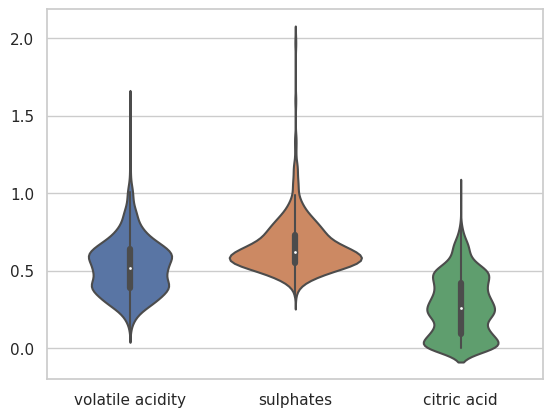

In [ ]:
sns.violinplot(data = df_wines[['volatile acidity', 'sulphates', 'citric acid']])

Os violin plots nos permitem ainda algumas personalizaçõesq que não estão disponíveis nos boxplots, a exemplo de assimetrias, na qual cada lado do boxplot representa a distribuição da variável analisada de acordo com um critério, que é uma segunda variável categórica binária. Isso se torna muito útil quando estamos lidando com grupos de variáveis categóricas e poucas numéricas. Para estes casos, podemos utilizar os seguintes parâmetros:

*   **data**: Conjunto de dados que desejamos representar
*   **x**: variável que desejamos representar no eixo horizontal
*   **y**: variável que desejamos representar no eixo vertical
*   **hue**: variável que controlará a cor do plot (melhor quando é binária)
*   **split**: parâmetro booleano (True/False) que define simetria
*   **inner**: parâmetro que define quais subdivisões mostraremos internamente

Vejamos um exemplo disso utilizando o nosso conjunto de dados sobre vinhos. Vamos avaliar como o pH dos vinhos se comporta para os vinhos com mais alcool (*alcohol* >= 10) ou menos alcool (*alcohol* <10). Além disso, queremos saber se há diferença nessas distribuições para as diferentes classes de qualidade. Para isso, criaremos uma nova coluna categórica em nosso conjunto de dados contendo os valores "high" e "low" de acordo com esse critério que acabamos de definir. Chamaremos esta nova coluna de *alcohol* level.

In [ ]:
# Criar uma nova coluna categórica descrita anteriormente
df_wines["alcohol level"] = ["high" if a >= 10 else "low" for a in df_wines['alcohol']]

<Axes: xlabel='quality', ylabel='pH'>

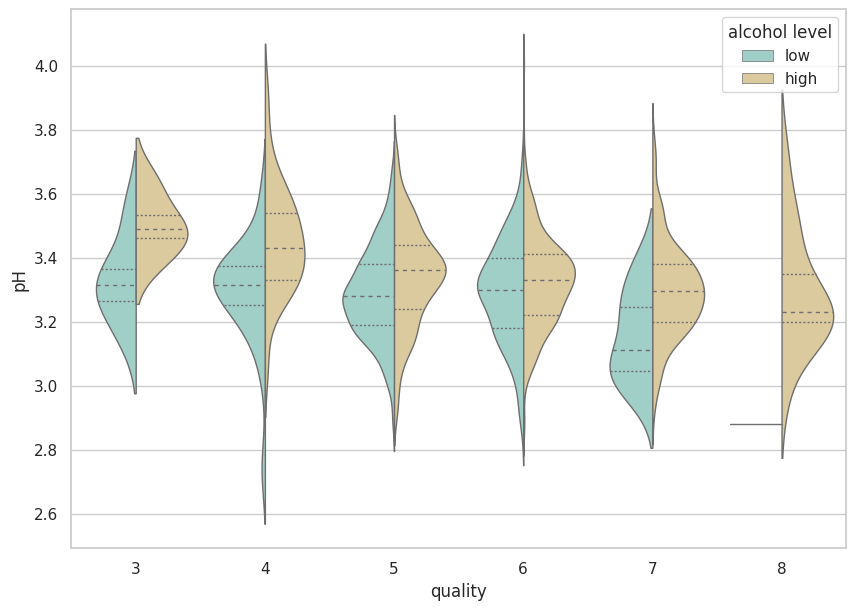

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(data=df_wines, x = "quality", y = "pH", hue="alcohol level", split=True,
               inner="quartile", linewidth=1, palette='BrBG_r')

# Outras visualizações

**Matrizes de Scatterplots (ou pairplots)**

As matrizes de scatterplots são visualizações bastante úteis para analisar a correlação entre diversas variáveis ao mesmo tempo. Na biblioteca `seaborn`, este tipo de visualização é conhecido como `pairplot`. Diferente das demais visualizações que compõem a biblioteca pandas, não é possível passar os parâmetros `x` e `y`. Entretanto, podemos passar os parâmetros `x_vars` e `y_vars`, que nos permitem selecionar quais variáveis serão plotadas, permitindo inclusive construir uma visualização não-quadrada. Além disso, o parâmetro `hue` pode ser usado para indicar uma terceira variável em cada um dos plots. Vejamos com isso funciona na prática.

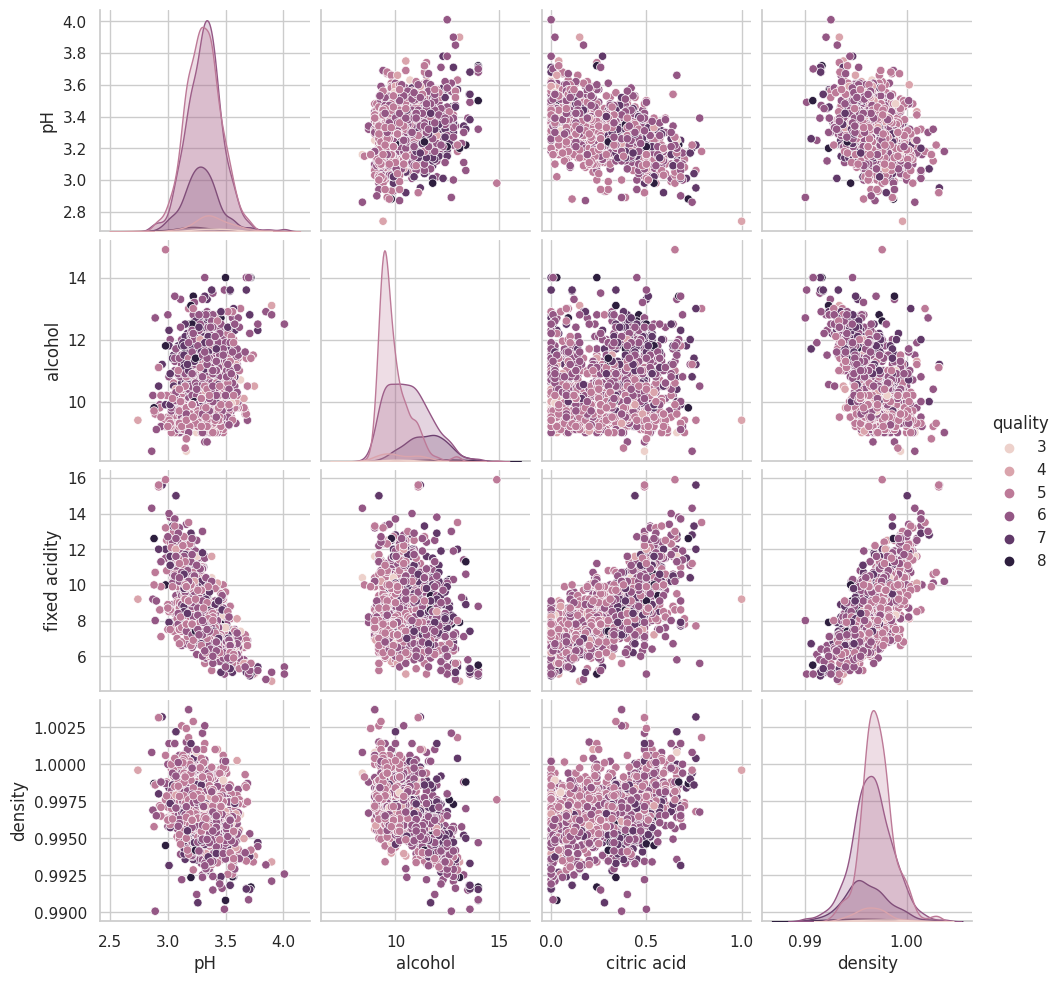

In [ ]:
sns.pairplot(data=df_wines, hue='quality', x_vars=['pH', 'alcohol','citric acid', 'density'],
             y_vars=['pH', 'alcohol','fixed acidity', 'density'])

Veja que nos quadrados onde as variáveis nos eixos x e y são iguais, é mostrada a distribuição daquela variável para cada uma das classes. No caso de um `pairplot` padrão, toda a diagonal seria composta por distribuições.

**Mapas de Calor (ou heatmaps)**

Quando trabalhamos com dataframes do pandas, podemos utilizar o método corr() para obter a matriz de correlação entre todas as variáveis. Uma maneira interessante de visualizar esta matriz são os mapas de calor , que usam escalas de cores (*colormaps*) para indicar o quão forte é a correlação. Assim como para o caso dos `pairplots`, os mapas de calor podem ser chamados passando-se somente os dados, e não admitem os parâmetros `x` e `y`. Entretanto, esta visualização permite algumas personalizações interessantes. Alguns dos parâmetros notáveis são:

*   **data**: Define o conjunto de dados a ser visualizado
*   **cmap**: Define o colormap a ser utilizado
*   **linecolor**: Define a cor das linhsa que separam os quadrados/células
*   **linewidth**: Define a espessura das linhas de divisão
*   **annot**: Caso True, mostra os valores em cada célula, caso False (padrão) não mostra. Pode também receber uma matriz.
*   **cbar**: Caso True (padrão), mostra a barra de cores ao lado, caso False não mostra

Vejamos abaixo o exemplo básico e a versão modificada pelos parâmetros.

<ipython-input-52-aaa05f4eff7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df_wines.corr())


<Axes: >

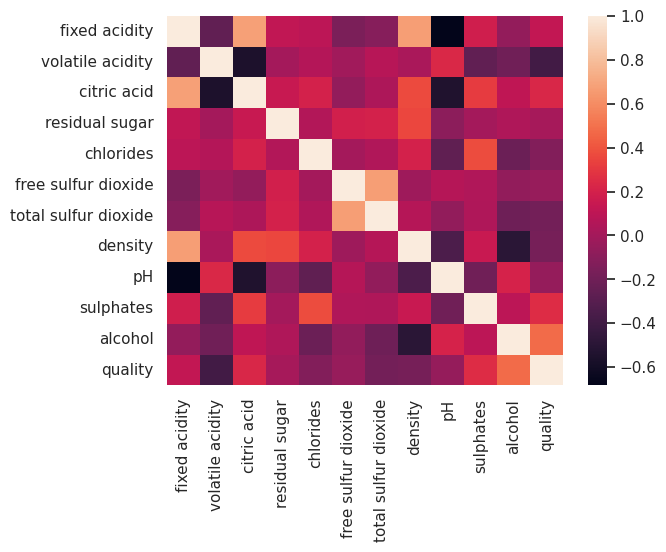

In [ ]:
sns.heatmap(data = df_wines.corr())

<ipython-input-53-9dc296d08ce7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df_wines.corr(), cmap='Blues', cbar=False, annot=True, linecolor='k', linewidths=2)


<Axes: >

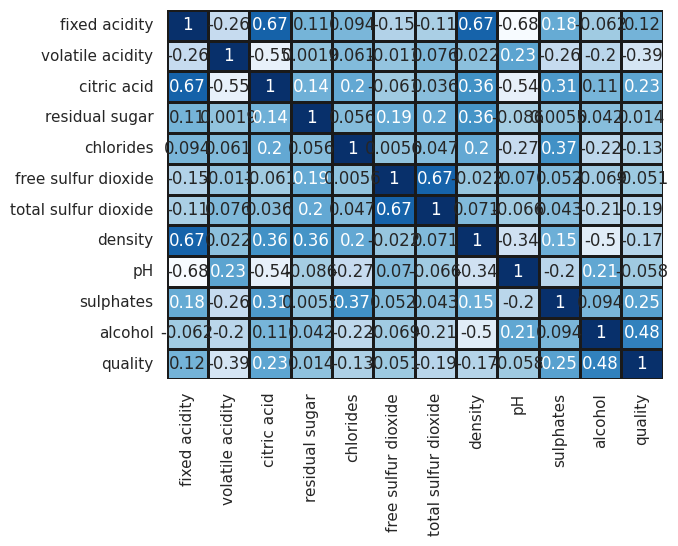

In [ ]:
sns.heatmap(data = df_wines.corr(), cmap='Blues', cbar=False, annot=True, linecolor='k', linewidths=2)

# Personalizando as visualizações com anotações e elementos adicionais

Por ser uma biblioteca derivada da `matplotlib`, podemos adicionar anotações em formas de textos ou marcações em todas as visualizações que construimos com a `seaborn`. Para isso, devemos utilizar as funções vinculadas aos eixos (ax) onde nossa visualização é mostrada, assim como faríamos com o matplotlib.

Algumas das ferramentas mais notáveis são:

*   **ax.text(x, y, s, color)**: Adiciona o texto s na posição (x,y)
*   **ax.axvline(x, ymin, ymax, color, linewidth, linestyle)**: adiciona uma linha vertical na posição x, de ymin a ymax
*   **ax.axhline(y, xmin, xmax, color, linewidth, linestyle)**: adiciona uma linha vertical na posição y, de xmin a xmax
*   **ax.axvspan(xmin, xmax, ymin, ymax,color, fill, alpha)**: adiciona um retângulo vertical que vai de xmin a xmax e de ymin a ymax
*   **ax.axhspan(ymin, ymax, xmin, xmax,color, fill, alpha)**: adiciona um retângulo horizontal que vai de xmin a xmax e de ymin a ymax

vejamos como isso funciona na prática.

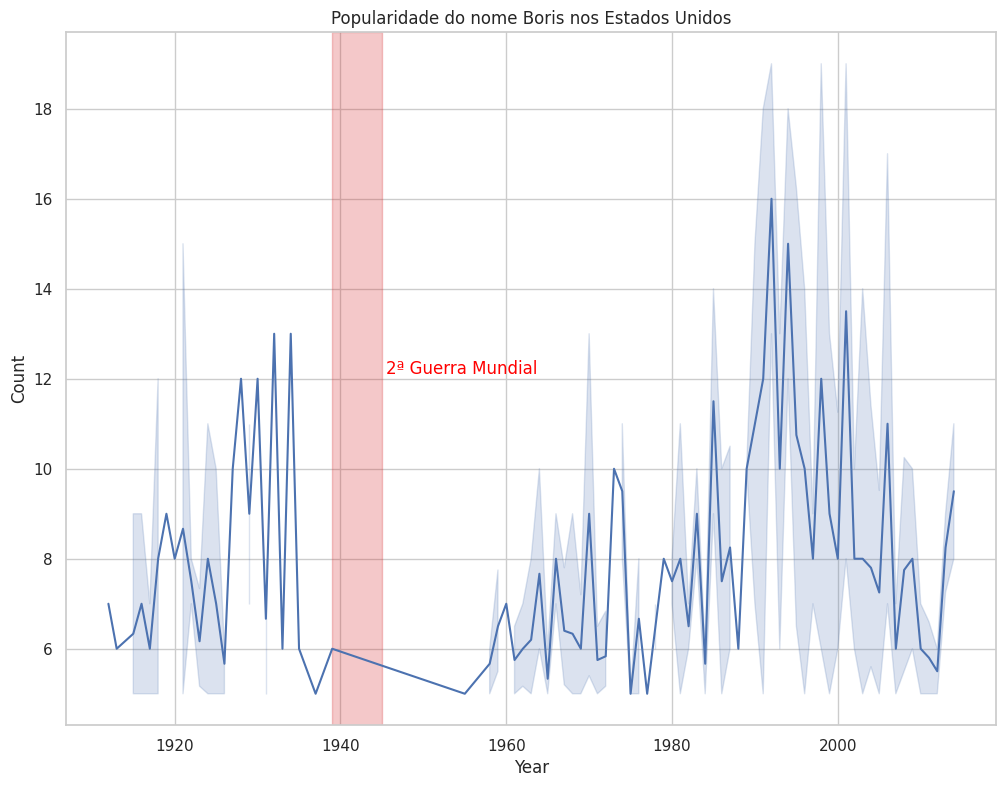

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
sns.lineplot(x='Year', y='Count',data=df_baby[df_baby['Name']=='Boris'], ax=ax)
ax.axvspan(xmin=1939, xmax=1945, color='tab:red', alpha=0.25)
ax.text(x=1945.5, y=12.1, s='2ª Guerra Mundial',color='red')
plt.title('Popularidade do nome Boris nos Estados Unidos')
plt.show()

# Plotly

Apesar da variedade de recursos ofereidos pelas bibliotecas `matplotlib` e `seaborn`, e da capacidade que elas possuem para desenvolver visualizações atraentes, efetivas e altamente personalizadas, essas bibliotecas são limitadas à geração de visualizações estáticas. Na maioria das situações, isso já é o suficiente para se alcançar o objetivo das visualizações. Entretanto, existem casos nos quais oferecer a possibilidade do usuário interagir com a visualização aumenta significativamente o valor desta.

A biblioteca `plotly` foi construída com a interatividade em mente, visando suprir a demanda por visualizações que possam ser exploradas pelo usuário no processo de análise, permitindo a descoberta de padrões por vezes ocultos nos dados. Isso é alcançado com o oferecimento de interações que incluem zoom, seleção de intervalos, seleção de variáveis, callouts, entre outros. Além disso, a biblioteca permite a criação de mais de 40 tipos de gráfico, incluindo todos os mostrados anteriormente, o que confere a ela a versatilidade para ser usada em áreas como estatística, finanças, ciências, artes, etc.

Nesta seção vamos aprender como utilizar o plotly para gerar visualizações interativas de alta qualidade para comunicar nossos dados da melhor maneira possível. Assim como a biblioteca `matplotlib`, a `plotly` possui diversos submódulos. Para esta aula, utilizaremos o módulo `plotly.express` (px) e construiremos a versão interativa de alguns dos gráficos anteriormente mostrados.

In [ ]:
import plotly.express as px

# Funcionalidades básicas da biblioteca

Como vimos anteriormente, as visualizações podem ser personalizados para que diversas informações sejam representadas visualmente. Podemos utilizar a biblioteca `plotly` para construir estas visualizações de maneira bastante similar ao que fizemos anteriormente. Para demonstrar tais funcionalidades, utilizaremos o mesmo gráfico de pontos que fizemos anteriormente na biblioteca `seaborn`, no entanto, a chamada básica aqui deve ser alterada para `px.scatter(data_frame, x, y)` onde:

*   **data_frame** é o conjunto de de dados que iremos mostrar
*   **x** é a nossa variável a ser mostrada no eixo x (geralmente a variável independente)
*   **y** é a nossa variável a ser mostrada no eixo y (geralmente a variável dependente)

In [ ]:
px.scatter(data_frame=df_wines[:150], x="fixed acidity", y="pH")

Veja que a visualização acima é bastante similar à que obtivemos utilizando a biblioteca `seaborn`. Se apontarmos o cursor para qualquer um dos pontos, veremos informações precisas a respeito das coordenadas de cada um dos pontos, o que dispensa a necessidade de estimar visualmente os valores de cada um desses pontos. Além disso, é possível selecionar uma área da visualização para termos uma visão mais aproximada (zoom), o que facilita que trabalhemos com conjuntos de dados maiores e selecionemos uma parte da visualização para estudar. Podemos ainda mover a visualização selecionando a ferramenta pan no menu superior esquerdo.

Apesar das vantagens, há alguns problemas com esta visualização. Um deles é o fato de que as dimensões do plot não é quadrado como recomendável. Além disso, por não ser explicitamente vinculada à `matplotlib`, não podemos passar um argumento do tipo ax para personalizar as figuras feitas com dash. O primeiro problema pode ser resolvido utilizando os parâmetros `width`(largura) e `height`(altura) que aceitam valores em pixels para definir as dimensões da visualização. Entretanto, para permitir mais visualizações, devemos atribuir o retorno da chamada acima a uma variável (geralmente nomeada `fig`) e isso é considerado uma boa prática quando trabalhamos com `plotly`.

Vejamos como isso funciona na prática.

In [ ]:
fig = px.scatter(data_frame=df_wines[:150], x="fixed acidity", y="pH", width=600, height=600)
fig.show()

Assim como em `seaborn` podemos personalizar nossa visualização atribuindo cores, tamanhos e estilos para diferentes variáveis do conjunto de dados, em `plotly` também é possível realizar isso. A chamada para isso pode ser modificada para `px.scatter(data_frame, x, y, color, symbol, size, hover_data, color_continuous_scale)` na qual:

*   **color**, (cor) é o nome do parâmetro que controlará as cores utilizadas na visualização
*   **symbol** (símbolo) é o nome do parâmetro que definirá o estilo/tipo de marcador utilizado
*   **size** (tamanho) é o nome do parâmetro que controlará o tamanho dos pontos/marcadores da visualização
*   **hover_data** (dados "flutuantes") é o parâmetro que define a lista de variáveis a ser exibidas na caixa flutuante em cada ponto
*   **size_max** (tamanho máximo) é o nome do parâmetro que controlará o tamanho máximo dos pontos na visualização
*   **color_continuous_scale** (escala de cores contínuas) é o parâmetro que definirá a escala de cores usada (colormap)

Para uma lista completa de parâmetros e suas descrições detalhadas, recomenda-se a leitura da [página de documentação sobre scatterplots em plotly express](https://plotly.com/python-api-reference/generated/plotly.express.scatter).

`sns.scatterplot(x="", y="",hue="density", size="citric acid", style="quality", data=)`

In [ ]:
fig = px.scatter(data_frame=df_wines[:150], x="fixed acidity", y="pH", width=600, height=600,
                color = "density", symbol = "quality", size='citric acid', size_max = 15,
                hover_data=['residual sugar', 'alcohol'], color_continuous_scale = 'magma')
#Comando para evitar sobreposição entre a barra de cor e a legenda
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=1.2, ticks="outside"))
fig.show()

Por fim, observe que clicando nos símbolos mostrados na legenda é possível escondê-los/mostrá-los na visualização, facilitando a análise individual de classes.

# Anotações, marcações e outras opções de personalização

Uma das razões para atribuir o retorno das funções que geral visualizações a uma variável é que isso nos permite adicionar novos elementos à mesma visualização em seguida, ou alterar outros parâmetros da visualização, como fizemos acima ao mover a barra de cores, evitando sobreposição com a legenda. De forma similar podemos adicionar outros elementos, como anotações, textos, linhas, formas geométricas, entre outros. Vejamos como cada um desses recursos podem ser utilizados no plotly.

Primeiramente, cada método nos permite passar os argumentos `labels` e `title`:

*   **labels** (rótulos) aceita um dicionário do tipo {"Nome da variável", "Novo nome"}
*   **title** (título) é o parâmetro utilizado para definir o título

**Anotações**

Para adicionar anotações, utilizamos o método `fig.add_annotations(x, y, text, font_size, font_color, font_family, showarrow)`, onde:

*   **x** é a posição horizontal do início do texto
*   **y** é a posição vertical do início do texto
*   **text** texto a ser exibido
*   **font_size** é o parâmetro que define o tamanho da fonte do texto
*   **font_color** é o parâmetro que define a cor da fonte do texto
*   **font_family** é o parâmetro que define o tipo da fonte do texto (ex: "Arial")
*   **showarrow** é o parâmetro booleano que define se mostraremos ou não a seta do texto ao ponto indicado


In [ ]:
girls = df_baby.loc[(df_baby['Gender']=='F') & (df_baby['Year']==1910)].groupby(['Name','Year','Gender']).sum().sort_values(by='Count', ascending=False).head(50).reset_index()[['Name','Year','Gender','Count']]
boys = df_baby.loc[(df_baby['Gender']=='M') & (df_baby['Year']==1910)].groupby(['Name','Year','Gender']).sum().sort_values(by='Count', ascending=False).head(50).reset_index()[['Name','Year','Gender','Count']]
df = pd.concat([girls,boys])
countg_ny = df_baby.loc[(df_baby['Name'].isin(girls['Name'])) & (df_baby['Gender']=='F') & (df_baby['Year']==1910) & (df_baby['State']=='NY')][['Name','Count']]
countb_ny = df_baby.loc[(df_baby['Name'].isin(boys['Name'])) & (df_baby['Gender']=='M') & (df_baby['Year']==1910) & (df_baby['State']=='NY')][['Name','Count']]
count_ny = pd.concat([countg_ny, countb_ny])
count_ny.set_index('Name', inplace=True)
count_ny = count_ny.reindex(index=df['Name'])
df = df.join(count_ny.reset_index()['Count'], how='left', sort=True, rsuffix='_NY')

<ipython-input-71-e4307c5d2e2f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-71-e4307c5d2e2f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = px.scatter(data_frame=df, x="Count_NY", y="Count", width=600, height=600,
                color = "Gender", hover_data=['Name'], color_discrete_sequence=['Red','Blue'],
                labels={"Count":"Total nos EUA", "Count_NY":"Contagem em Nova York"},
                title='50 nomes mais populares em 1910 (por gênero)')
fig.add_annotation(x=1923, y=22848, text="O nome Mary é um outlier", font_size=14,
                   font_color='Red',font_family='Trebuchet', showarrow=True)
fig.show()

**Linhas**

Podemos adicionar linhas ao nosso plot de forma bastante simples, utilizando os métodos `fig.add_vline` e `fig.add_hline`, com os seguintes parâmetros:



*   **x** é a posição horizontal da linha vertical. Somente para vline!
*   **y** é a altura onde será traçada a linha horizontal. Somente para hline!
*   **line_width** é o parâmetro que define a espessura da linha a ser traçada
*   **line_dash** é o parâmetro que define o tracejado da linha a ser traçada. Pode ser 'dash', 'dot', ou 'dashdot'.
*   **line_color** é o parâmetro que define a cor da linha a ser traçada

In [ ]:
fig.add_vline(x=500, line_width=3, line_dash="dash", line_color="black")
fig.add_hline(y=5000, line_width=2, line_dash="dot", line_color="green")
fig.show()

**Retângulos**

Podemos adicionar retângulos à nossa visualização como uma maneira de destacar alguma área do gráfico. Para isso, podemos utilizar os métodos `fig.add_hrect` ou `fig.add_vrect` com os seguintes parâmetros:

*   **x0 e x1** definem o início e o final da área vertical destacada, respectivamente. Somente para `vrect`!
*   **y0 e y1** definem o início e o final da área horizontal destacada, respectivamente. Somente para `hrect`!
*   **fillcolor** é o parâmetro que define a cor da área a ser criada
*   **opacity** é o parâmetro que define a opacidade da área a ser criada
*   **line_width** é o parâmetro que define a espessura da linha que delimita a área criada


In [ ]:
fig.add_vrect(x0=500, x1=1000, line_width=0, fillcolor="grey", opacity=0.15)
fig.show()

**Outras formas**

Podemos adicionar formas diversas à nossa visualização, a exemplo de círculos, elipses, retângulos ou linhas diagonais. Para isso utilizamos o método `fig.add_shape`, que aceita, dentre outros, os seguintes parâmetros:

*   **type** define o tipo da forma a ser inserida na visualização
*   **x0, x1, y0 e y1** definem o início e final das formas
*   **fillcolor** é o parâmetro que define a cor da área a ser criada
*   **opacity** é o parâmetro que define a opacidade da área a ser criada
*   **line_width** é o parâmetro que define a espessura da linha que delimita a área criada
*   **line_color** é o parâmetro que define a espessura da linha que delimita a área criada


In [ ]:
fig = px.scatter(data_frame=df, x="Count_NY", y="Count", width=600, height=600,
                color = "Gender", hover_data=['Name'], color_discrete_sequence=['Red','Blue'],
                labels={"Count":"Total nos EUA", "Count_NY":"Contagem em Nova York"},
                title='50 nomes mais populares em 1910 (por gênero)')
fig.add_annotation(x=1500, y=15000, text="Linha que define uma correlação perfeita", font_size=14,
                   font_color='black',font_family='Trebuchet', showarrow=True)
fig.add_shape(type ='line', x0=0, x1=2000, y0=0, y1=20000, line_width=2)
fig.show()

# Permitindo ainda mais interatividade

Além do menu básico, é possível permitir que o usuário tenha muitas outras opções de interação com os gráficos que criamos. Uma das maneiras de conferir isso é através da disponibilização de configurações avançadas no menu da visualização. Um exemplo é mostrado a seguir. Para mais informações, sugere-se a leitura da [documentação sobre configurações](https://plotly.com/python/configuration-options/).

In [ ]:
fig.update_layout(dragmode='drawline',newshape=dict(line_color='green'))
fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

# Animações

O uso de animações é um recurso interessante para mostrar tendências aos usuários. Entretanto este recurso deve ser utilizado com bastante cautela. Para demonstrar este recurso, vamos utilizar o conjunto de dados de nome de bebês, e verificar como evoluiu a popularidade dos 50 nomes mais usados em 1910 para meninos e para meninas. Para isso, precisamos reformatar o nosso conjunto de dados da seguinte maneira:

In [ ]:
girls = df_baby.loc[(df_baby['Gender']=='F') & (df_baby['Year']==1910)].groupby(['Name','Year','Gender']).sum().sort_values(by='Count', ascending=False).head(50).reset_index()[['Name','Year','Gender','Count']]
boys = df_baby.loc[(df_baby['Gender']=='M') & (df_baby['Year']==1910)].groupby(['Name','Year','Gender']).sum().sort_values(by='Count', ascending=False).head(50).reset_index()[['Name','Year','Gender','Count']]
df_girls = df_baby.loc[(df_baby['Name'].isin(girls['Name'])) & (df_baby['Gender']=='F')][['Name','Count','Year','Gender','State']].groupby(['Name','Year','Gender']).sum().reset_index()[['Name','Year','Gender','Count']]
df_boys = df_baby.loc[(df_baby['Name'].isin(boys['Name'])) & (df_baby['Gender']=='M')][['Name','Count','Year','Gender','State']].groupby(['Name','Year','Gender']).sum().reset_index()[['Name','Year','Gender','Count']]
df = pd.concat([df_boys, df_girls])
countg_ny = df_baby.loc[(df_baby['Name'].isin(girls['Name'])) & (df_baby['Gender']=='F') & (df_baby['State']=='NY')][['Name','Count','Year']]
countb_ny = df_baby.loc[(df_baby['Name'].isin(boys['Name'])) & (df_baby['Gender']=='M')  & (df_baby['State']=='NY')][['Name','Count','Year']]
count_ny = pd.concat([countg_ny, countb_ny])
count_ny.set_index(['Name','Year'], inplace=True)
count_ny = count_ny.reindex(index=df[['Name','Year']])
df = df.join(count_ny.reset_index()['Count'], how='left', sort=True, rsuffix='_NY')

<ipython-input-73-ad98362bb173>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-73-ad98362bb173>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-73-ad98362bb173>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-73-ad98362bb173>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

O parâmetro `animation_frame` nos permite indicar qual das variáveis será utilizada para controlar a animação. Em nosso caso, utilizaremos a variável ano, conforme mostrado anteriormente.

In [ ]:
fig = px.scatter(data_frame=df, x="Count_NY", y="Count", width=600, height=600,
                color = "Gender", hover_data=['Name'], animation_frame='Year', color_discrete_sequence=['Red','Blue'],
                labels={"Count":"Total nos EUA", "Count_NY":"Contagem em Nova York"},
                title='50 nomes mais populares em 1910 (por gênero)')
fig.show()